In [1]:
import numpy as np
import cv2
import matplotlib.pyplot as plt

#definimos nuestras unidades
um = 1e-6
mm = 1e-3
cm = 1e-2
nm= 1e-9

N = 2048
M = 2048
w_length = 514*nm #definimos la longitud de onda
k0=2*np.pi/w_length
dx=dy=60*um #definimos el tamaño de pixel con condiciones de mundo

In [2]:
def convol(Uin, h, padding=1):
    """
    2D convolution using FFT.
    """
    reference_image = np.fft.fft2(Uin, s=[Uin.shape[0] * padding, Uin.shape[1] * padding])
    frame = np.fft.fft2(h, s=[h.shape[0] * padding, h.shape[1] * padding])

    conv = frame * reference_image
    conv = np.fft.fftshift(np.abs(np.fft.ifft2(conv)))

    return conv

1.0 0.0


<function matplotlib.pyplot.show(close=None, block=None)>

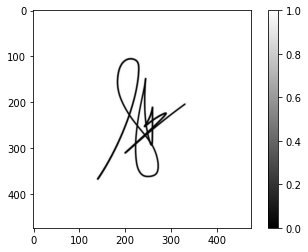

In [2]:
T = cv2.imread("firma.jpg",cv2.IMREAD_GRAYSCALE)
T = T/np.max(T)
print(np.max(T),np.min(T))
plt.figure()
plt.imshow(T,cmap="gray")
plt.colorbar()
plt.show

In [3]:
def prop(Uin,z,k,d1):
    
    N=Uin.shape[0]
    
    #Coordenadas en el plano de entrada
    x1,y1 = np.meshgrid( np.arange(-N/2.,N/2.) * d1,
                            np.arange(-N/2.,N/2.) * d1)
    
    
    h=np.exp(-1j*k*z)*np.exp(-1j*k*((x1**2)+(y1**2))/(2*z))
    
    H=np.fft.fft2(h, s=[h.shape[0], h.shape[1]])
    U=np.fft.fft2(Uin, s=[Uin.shape[0], Uin.shape[1]])
    conv=U*H
    convo = np.fft.fftshift(np.abs(np.fft.ifft2(conv)))
    
    
    return convo    
    

In [5]:
def propc(Uin,z,k,d1):
    
    N=Uin.shape[0]
    
    #Coordenadas en el plano de entrada
    x1,y1 = np.meshgrid( np.arange(-N/2.,N/2.) * d1,
                            np.arange(-N/2.,N/2.) * d1)
        
    h=np.conjugate(np.exp(1j*k*z)*np.exp(1j*k*((x1**2)+(y1**2))/(2*z)))
    
    H=np.fft.fft2(h, s=[h.shape[0], h.shape[1]])
    U=np.fft.fft2(Uin, s=[Uin.shape[0], Uin.shape[1]])
    conv=U*H
    convo = np.fft.fftshift(np.abs(np.fft.ifft2(conv)))
    
    
    return convo    

<function matplotlib.pyplot.show(close=None, block=None)>

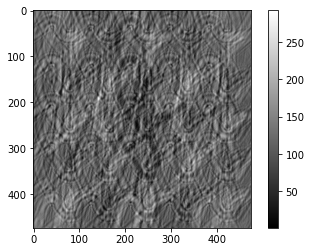

In [6]:
z1=prop(T,60*cm,k0,dx)
plt.figure()
plt.imshow(z1,cmap="gray")
plt.colorbar()
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

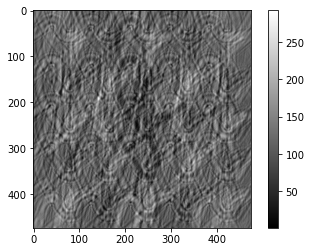

In [24]:
No=T.shape[0]
x,y = np.meshgrid( np.arange(-No/2.,No/2.) * dx,
                            np.arange(-No/2.,No/2.) * dy)

Key=np.exp(1j*2*np.pi*(x+np.sin(y)))
K=z1*Key

plt.figure()
plt.imshow(np.abs(K),cmap="gray")
plt.colorbar()
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

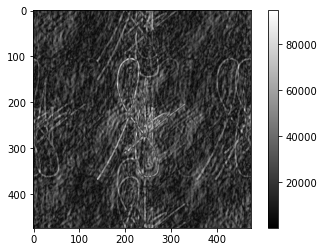

In [25]:
z2=prop(K,60*cm,k0,dx)
plt.figure()
plt.imshow(z2,cmap="gray")
plt.colorbar()
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

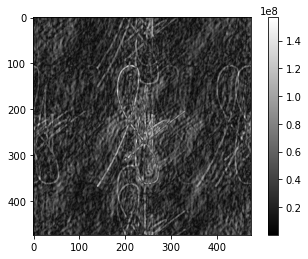

In [26]:
BSO=6*mm
dn=0.015
br=57.78
Uec=np.pi*BSO*dn*z2/(w_length*np.cos(br))
plt.figure()
plt.imshow(Uec,cmap="gray")
plt.colorbar()
plt.show